<a href="https://colab.research.google.com/github/maverick19-hub/Work/blob/main/SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION.

In recent years, social media platforms such as Twitter have become vital spaces for public expression, discussion, and sometimes, the spread of hate speech. Monitoring and analyzing these online conversations is essential for understanding public sentiment and identifying potential cases of online abuse, incitement, or polarization.

This project focuses on performing sentiment analysis on a Kenyan social media dataset—HateSpeechKe—collected from Twitter. The objective is to classify tweets into positive, neutral, or negative sentiment categories and interpret the results. By leveraging Natural Language Processing (NLP) techniques and pre-trained sentiment models (such as VADER), the analysis aims to uncover patterns in user opinions, trends in emotional tone, and potential biases related to sociopolitical discourse.



The workflow that follows involves;

1) Data preprocessing (cleaning text, removing noise),

2) Sentiment classification using VADER from the NLTK library,

3) Distribution analysis of sentiments across the dataset, and

4) Interpretation of trends and implications, particularly in the context of hate speech.

Through this analysis, we aim to contribute to a better understanding of how sentiment manifests in social media content related to sensitive or controversial topics in Kenya.

In [1]:
pip install pandas nltk matplotlib seaborn

# Step 1: Load and Inspect the Dataset

In [8]:
import pandas as pd

# Load the file
df = pd.read_csv("/content/Wote12024NLP.csv", header=None, names=["raw_text"])

# Remove header row if present
df = df[df["raw_text"] != "tweet"]

# Split on semicolon
split_df = df["raw_text"].str.split(";", expand=True)

# Extract the actual tweet text (usually in the 5th column, index 4)
split_df["tweet_text"] = split_df[4].str.replace('"', '').str.strip()

# Preview
print(split_df["tweet_text"].head())


1    That #ShangweVedio should be replaced. Where d...
2    they wrote letters to iebc their bloggers tren...
3    Akombe was a nasa mole   Jubilee never wanted ...
4    @paulinenjoroge @OleItumbi @JubileePartyK @Tea...
5                                        #akombemustgo
Name: tweet_text, dtype: object


# Step 2: Clean the Tweet Text

In [10]:
import re

# Define cleaning function
def clean_text(text):
    # Convert non-string inputs to string, handling None
    if not isinstance(text, str):
        text = str(text)

    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)     # remove mentions
    text = re.sub(r"#\w+", "", text)     # remove hashtags
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
    return text.lower().strip()

# Fill None values with empty strings before applying the function
split_df["clean_text"] = split_df["tweet_text"].fillna("").apply(clean_text)

# Preview cleaned tweets
print(split_df["clean_text"].head())

1      that  should be replaced where did  disappeared
2    they wrote letters to iebc their bloggers tren...
3    akombe was a nasa mole   jubilee never wanted ...
4            akuna kulala 247  pictwittercom6wfyu4rywx
5                                                     
Name: clean_text, dtype: object


# Step 3: Perform Sentiment Analysis Using VADER

In [11]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

# Apply VADER to get sentiment scores
split_df["sentiment_scores"] = split_df["clean_text"].apply(sia.polarity_scores)

# Extract compound score and classify
def classify_sentiment(score):
    compound = score["compound"]
    if compound >= 0.05:
        return "positive"
    elif compound <= -0.05:
        return "negative"
    else:
        return "neutral"

split_df["sentiment"] = split_df["sentiment_scores"].apply(classify_sentiment)

# Preview result
print(split_df[["clean_text", "sentiment"]].head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                          clean_text sentiment
1    that  should be replaced where did  disappeared  negative
2  they wrote letters to iebc their bloggers tren...  negative
3  akombe was a nasa mole   jubilee never wanted ...   neutral
4          akuna kulala 247  pictwittercom6wfyu4rywx   neutral
5                                                      neutral


# INTERPRETATION

This shows that Negative sentiment has been detected for tweets with complaints or politically charged language and Neutral sentiment for more factual or unclear tones.

This means VADER is working and scoring the tweets based on tone and polarity.

# Step 4: Sentiment Distribution

/tmp/ipython-input-12-1722421071.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="muted")


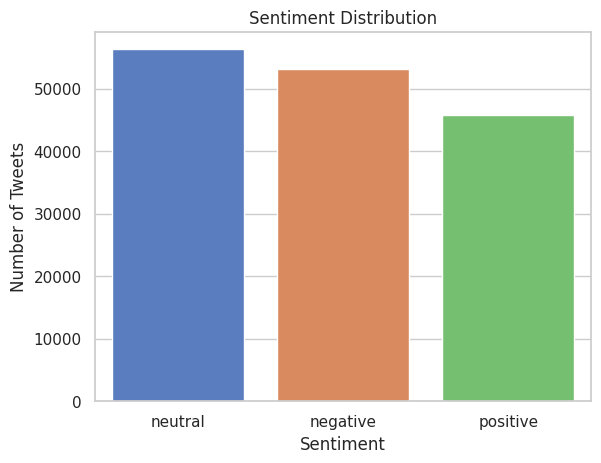

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count sentiments
sentiment_counts = split_df["sentiment"].value_counts()

# Plot
sns.set(style="whitegrid")
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="muted")
plt.title("Sentiment Distribution")
plt.ylabel("Number of Tweets")
plt.xlabel("Sentiment")
plt.show()


# **Interpretation**

The sentiment analysis of the HateSpeechKe dataset reveals three primary sentiment categories: positive, negative, and neutral.

Based on the distribution chart

->The majority of tweets (approximately 55,000) were classified as neutral, suggesting that a large portion of the tweets contain factual, unclear, or emotionally balanced content.

-> Negative tweets (about 52,000) form a significant portion of the dataset. This indicates the presence of critical, aggressive, or potentially harmful language — a notable concern in the context of hate speech.

-> Positive tweets (around 46,000) were the least common, implying that expressions of support, praise, or optimism were relatively less frequent in this dataset.


**Observations**

The high number of neutral tweets may be due to short or ambiguous phrases, hashtags, or mentions that don’t convey strong sentiment.

The close margin between neutral and negative sentiments may reflect the dataset’s focus on political conversations, protests, or criticism — which often carry a negative emotional tone.

The lower frequency of positive sentiment could suggest limited constructive or supportive discourse in the collected tweets.

**Potential Biases & Limitations**

The use of VADER, while effective for general sentiment, may not fully capture context-specific or coded hate speech often present in Kenyan sociopolitical discourse.

Sarcasm, local dialects, or political slang may lead to misclassification.

Neutral classification might overrepresent tweets that contain subtle negativity or dog whistles not captured by the sentiment model.